In [21]:
!pip install -q datascience                                         
!pip install -q pandas-profiling  

In [3]:
!pip install -q --upgrade pandas-profiling

In [4]:
import pandas as pd                                                
from ydata_profiling import ProfileReport                          
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                 
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     
import seaborn as sns                                               
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp    

In [5]:
url="https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv"
df = pd.read_csv(url)
print(df.head())


   Id  Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  7/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  2/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2   3/9/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3   2/2/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4   5/9/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37  revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753  
1  3.0    0    0    0    0    0    0    0    0  6923131  
2  3.0    0    0    0    0    0    0    0    0  2055379  
3  7.5   25   12   10    6   18   12   12    6  2675511  
4  3.0    5    1    3    2    3    4    3    3  4316715  

[5 rows x 43 columns]


In [6]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


### Data Analysis


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [8]:
#to get duplicate value
df.duplicated().value_counts()

False    137
dtype: int64

In [9]:
#there is no duplicate data found, but below code can be used to drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
#to get nulls
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

### Handling missing data


In [11]:
df['P6'].isna().value_counts(), df['P6'].mode()[0]

(False    133
 True       4
 Name: P6, dtype: int64,
 2.0)

In [12]:
df['P6'] = df['P6'].fillna(df['P6'].mode()[0])

In [13]:
df['P6'].isna().value_counts(), df['P6'].mode()[0]

(False    137
 Name: P6, dtype: int64,
 2.0)

In [14]:
df['P7'].isna().value_counts(), df['P7'].mode()[0]

(False    133
 True       4
 Name: P7, dtype: int64,
 5.0)

In [15]:
df['P7'] = df['P7'].fillna(df['P7'].mode()[0])

In [16]:
df['P7'].isna().value_counts(), df['P7'].mode()[0]

(False    137
 Name: P7, dtype: int64,
 5.0)

In [17]:
profile = ProfileReport(df, title="Shopping Sales")

In [18]:
profile.to_file("Shopping.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

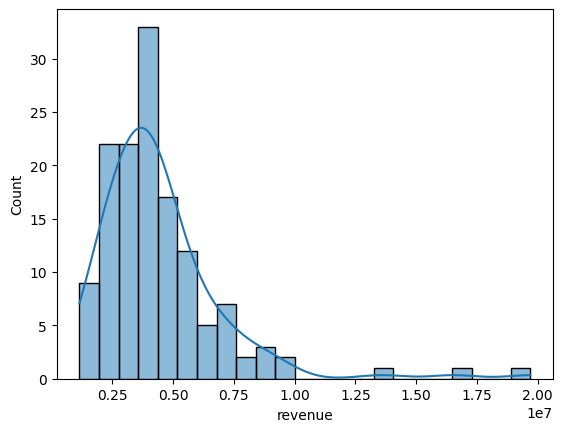

In [19]:
sns.histplot(df['revenue'], kde=True)
plt.show()

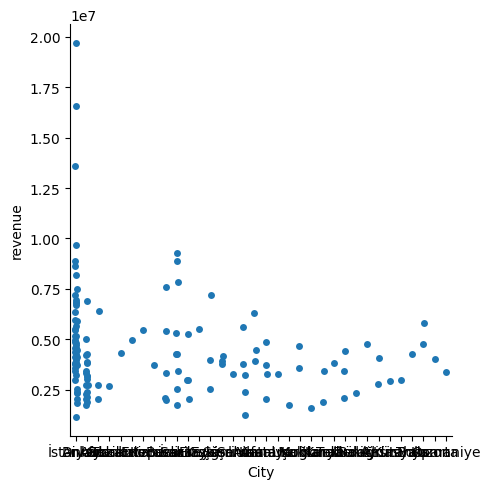

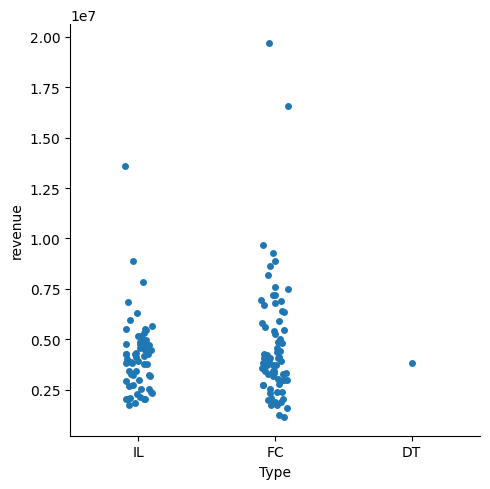

In [24]:
# Visualize the relationship between the categorical columns and the target variable
cat_cols = ['City', 'Type']
for col in cat_cols:
    sns.catplot(x=col, y='revenue', data=df)
    plt.show()

In [25]:
print(df.columns.tolist())

['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


In [26]:
X = df[['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']]
y = df['revenue']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4) 

In [28]:
X_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
37,37,8/23/2010,Ankara,Big Cities,IL,2,3.0,4.0,3.0,1,...,1.0,3.0,5,5,5,3,4,4,3,1
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,5.0,2.5,0,0,0,0,0,0,0,0
101,101,9/9/2012,Balıkesir,Other,IL,3,4.0,5.0,4.0,2,...,2.0,3.0,5,5,5,5,4,5,5,4
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,2.0,3.0,5,3,4,5,5,4,3,4
58,58,4/11/2012,İstanbul,Big Cities,FC,3,4.0,4.0,5.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,54,6/5/1999,Muğla,Other,IL,2,4.0,5.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
77,77,10/25/2013,Ankara,Big Cities,FC,3,5.0,3.0,5.0,3,...,3.0,2.0,0,0,0,0,0,0,0,0
83,83,8/12/1998,İstanbul,Big Cities,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,5,5,5,3,4,4,5,3
44,44,10/13/2004,Ankara,Big Cities,IL,2,3.0,5.0,3.0,1,...,2.0,3.0,3,5,5,2,3,4,3,4


In [29]:
X_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5.0,1.0,5,5,4,2,5,5,5,3
125,125,9/1/2010,Trabzon,Other,IL,9,6.0,6.0,6.0,4,...,5.0,7.5,20,9,15,4,24,12,16,2
22,22,7/1/2006,Kayseri,Other,FC,9,6.0,6.0,6.0,4,...,7.5,7.5,0,0,0,0,0,0,0,0
84,84,10/9/2009,İzmir,Big Cities,IL,4,4.0,5.0,3.0,1,...,2.0,3.0,4,3,3,2,4,4,3,1
29,29,10/13/2006,Ankara,Big Cities,FC,1,1.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
26,26,2/23/2010,Ankara,Big Cities,IL,3,5.0,4.0,5.0,2,...,3.0,3.0,5,5,4,3,3,4,3,1
91,91,6/20/2007,Bursa,Other,IL,3,5.0,4.0,4.0,1,...,1.0,3.0,0,0,0,0,0,0,0,0
78,78,9/29/2012,Ankara,Big Cities,IL,9,7.5,6.0,7.5,8,...,7.5,2.5,20,9,20,4,18,12,12,2
48,48,12/21/2011,Kayseri,Other,FC,4,5.0,4.0,4.0,2,...,4.0,3.0,0,0,0,0,0,0,0,0
33,33,4/23/2013,Samsun,Other,FC,2,3.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0


In [30]:
y_train

37     2740687
9      5444227
101    4758476
0      5653753
58     3004429
        ...   
54     4651866
77     1904842
83     5966193
44     4264176
1      6923131
Name: revenue, Length: 82, dtype: int64

In [31]:
y_test

99     13575224
125     4780607
22      3956086
84      4250553
29      3447890
26      2267425
91      2083447
78      3871344
48      7201784
33      2371202
120     4067566
65      1756069
12      1734634
85      7495092
109     4219263
56      2390534
113     2097022
57      3258837
27      5435276
62      5286212
100     9652350
28      4705945
82      3807496
123     4263629
107     3248660
63      1619683
60      3164972
72      2525375
38      5461700
105     2792031
8       4952497
102     2738052
129     3939804
25      3778621
90      3426169
89      2364478
121     3445076
32      3261924
130     3376145
70      3982767
133     9262754
40      6836483
24      8904084
5       5017319
98      2344689
46      4250758
79      6313221
88      2025297
75     16549064
80      3727364
51      3273041
10      3745135
18      5337526
69      3452382
53      5595267
Name: revenue, dtype: int64

In [33]:
# Split your data into independent and dependent variables
X = df.drop('revenue', axis=1)  # independent variables
y = df['revenue']  # dependent variable

# Print the shapes of X and y
print(f"Independent variable shape: {X.shape}")
print(f"Dependent variable shape: {y.shape}")

Independent variable shape: (137, 42)
Dependent variable shape: (137,)


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



X = df.drop(['Id','Open Date','City','City Group','Type','revenue'], axis=1)  # independent variables

# Define the models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

# Evaluate each model using cross-validation
for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{type(model).__name__} score: {scores.mean()}")

# Select the best model
best_model = RandomForestRegressor()

# Train the best model on the full dataset
best_model.fit(X, y)


LinearRegression score: -1.5676283231470005
DecisionTreeRegressor score: -1.305452737781799
RandomForestRegressor score: -0.20726616687782995
KNeighborsRegressor score: -0.10121917789939794


RandomForestRegressor()

In [38]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df.drop(['Id','Open Date','City','City Group','Type','revenue'], axis=1)  # independent variables
y = df['revenue']  # dependent variable

# Perform feature selection using Pearson correlation coefficient
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = df.columns[selector.get_support(indices=True)].tolist()

# Print the names of the selected features
print(f"Selected features: {selected_features}")

Selected features: ['Open Date', 'P1', 'P8', 'P23', 'P24']
